In [1]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,MiniBatchDictionaryLearning,DictionaryLearning

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(0)

# load data

In [2]:
import pickle, scipy
x = np.load("dataset_challenge_moves_supervised_opponent_position.npz")['x']
y = np.load("dataset_challenge_moves_supervised_opponent_position.npz")['y']

x = scipy.sparse.vstack(x).todense()

## The dataset was stored using scipy sparse arrays, because the matrices contain mostly zeros. In case you wish to use 
## supervised learning techniques that don't accept sparse matrices, you have to convert x into a dense array and reshape it accordingly
#x = x.todense()
#x = np.array(x).reshape(-1,(2*mazeHeight-1)*(2*mazeWidth-1))

y = scipy.sparse.vstack(y).todense()
y = np.argmax(np.array(y),1)

print("Dataset load: ",x.shape,y.shape) 

Dataset load:  (58534, 1189) (58534,)


In [3]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=4, random_state=0,verbose =1)
kmeans.fit(x)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1234551.745492116
start iteration
done sorting
end inner loop
Iteration 1, inertia 1216547.928509455
start iteration
done sorting
end inner loop
Iteration 2, inertia 1189408.7810646857
start iteration
done sorting
end inner loop
Iteration 3, inertia 1171419.7556234037
start iteration
done sorting
end inner loop
Iteration 4, inertia 1169893.461723336
start iteration
done sorting
end inner loop
Iteration 5, inertia 1168650.730478301
start iteration
done sorting
end inner loop
Iteration 6, inertia 1167211.5538149928
start iteration
done sorting
end inner loop
Iteration 7, inertia 1163855.7821572775
start iteration
done sorting
end inner loop
Iteration 8, inertia 1160754.47013673
start iteration
done sorting
end inner loop
Iteration 9, inertia 1159847.5987776457
start iteration
done sorting
end inner loop
Iteration 10, inertia 1159607.0421410452
start iteration
done sorting
end inner loop
Iteration 11,

Iteration 39, inertia 1172710.94860579
start iteration
done sorting
end inner loop
Iteration 40, inertia 1172710.838896424
start iteration
done sorting
end inner loop
Iteration 41, inertia 1172710.6710891512
start iteration
done sorting
end inner loop
Iteration 42, inertia 1172710.5153472319
start iteration
done sorting
end inner loop
Iteration 43, inertia 1172710.3672049493
start iteration
done sorting
end inner loop
Iteration 44, inertia 1172710.2703436804
start iteration
done sorting
end inner loop
Iteration 45, inertia 1172710.1704606204
start iteration
done sorting
end inner loop
Iteration 46, inertia 1172710.0835032645
start iteration
done sorting
end inner loop
Iteration 47, inertia 1172709.998255803
start iteration
done sorting
end inner loop
Iteration 48, inertia 1172709.9119855207
start iteration
done sorting
end inner loop
Iteration 49, inertia 1172709.849665844
start iteration
done sorting
end inner loop
Iteration 50, inertia 1172709.8021841976
start iteration
done sorting


Iteration 18, inertia 1172614.4774126825
center shift 1.190587e-03 within tolerance 1.778085e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1237185.6375904616
start iteration
done sorting
end inner loop
Iteration 1, inertia 1234994.1993196318
start iteration
done sorting
end inner loop
Iteration 2, inertia 1219040.032059781
start iteration
done sorting
end inner loop
Iteration 3, inertia 1209625.8715105555
start iteration
done sorting
end inner loop
Iteration 4, inertia 1204372.023539777
start iteration
done sorting
end inner loop
Iteration 5, inertia 1190343.3549216343
start iteration
done sorting
end inner loop
Iteration 6, inertia 1172930.078846217
start iteration
done sorting
end inner loop
Iteration 7, inertia 1172816.732123418
start iteration
done sorting
end inner loop
Iteration 8, inertia 1172779.9492396226
start iteration
done sorting
end inner loop
Iteration 9, inertia 1172758.594526982
start iteration
done sorting
end inner loop


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=1)

100%|██████████| 9/9 [08:07<00:00, 54.19s/it]


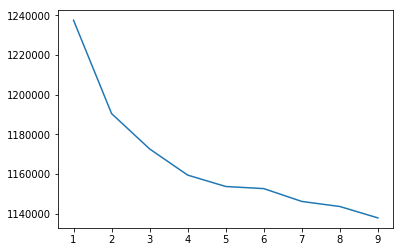

In [4]:
import tqdm
inertias = []
nclust = range(1,10)
### CELL TO COMPLETE, generate a KMeans model with varying n_clusters, fit it to the data 
### and add its inertia to the inertia list
for i in tqdm.tqdm(nclust):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)
plt.plot(nclust,inertias)


In [5]:
kmeans = KMeans(n_clusters=4, random_state=0,verbose =1)
kmeans.fit(x)
centroids = kmeans.cluster_centers_

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1234551.745492116
start iteration
done sorting
end inner loop
Iteration 1, inertia 1216547.928509455
start iteration
done sorting
end inner loop
Iteration 2, inertia 1189408.7810646857
start iteration
done sorting
end inner loop
Iteration 3, inertia 1171419.7556234037
start iteration
done sorting
end inner loop
Iteration 4, inertia 1169893.461723336
start iteration
done sorting
end inner loop
Iteration 5, inertia 1168650.730478301
start iteration
done sorting
end inner loop
Iteration 6, inertia 1167211.5538149928
start iteration
done sorting
end inner loop
Iteration 7, inertia 1163855.7821572775
start iteration
done sorting
end inner loop
Iteration 8, inertia 1160754.47013673
start iteration
done sorting
end inner loop
Iteration 9, inertia 1159847.5987776457
start iteration
done sorting
end inner loop
Iteration 10, inertia 1159607.0421410452
start iteration
done sorting
end inner loop
Iteration 11,

Iteration 39, inertia 1172710.94860579
start iteration
done sorting
end inner loop
Iteration 40, inertia 1172710.838896424
start iteration
done sorting
end inner loop
Iteration 41, inertia 1172710.6710891512
start iteration
done sorting
end inner loop
Iteration 42, inertia 1172710.5153472319
start iteration
done sorting
end inner loop
Iteration 43, inertia 1172710.3672049493
start iteration
done sorting
end inner loop
Iteration 44, inertia 1172710.2703436804
start iteration
done sorting
end inner loop
Iteration 45, inertia 1172710.1704606204
start iteration
done sorting
end inner loop
Iteration 46, inertia 1172710.0835032645
start iteration
done sorting
end inner loop
Iteration 47, inertia 1172709.998255803
start iteration
done sorting
end inner loop
Iteration 48, inertia 1172709.9119855207
start iteration
done sorting
end inner loop
Iteration 49, inertia 1172709.849665844
start iteration
done sorting
end inner loop
Iteration 50, inertia 1172709.8021841976
start iteration
done sorting


Iteration 18, inertia 1172614.4774126825
center shift 1.190587e-03 within tolerance 1.778085e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1237185.6375904616
start iteration
done sorting
end inner loop
Iteration 1, inertia 1234994.1993196318
start iteration
done sorting
end inner loop
Iteration 2, inertia 1219040.032059781
start iteration
done sorting
end inner loop
Iteration 3, inertia 1209625.8715105555
start iteration
done sorting
end inner loop
Iteration 4, inertia 1204372.023539777
start iteration
done sorting
end inner loop
Iteration 5, inertia 1190343.3549216343
start iteration
done sorting
end inner loop
Iteration 6, inertia 1172930.078846217
start iteration
done sorting
end inner loop
Iteration 7, inertia 1172816.732123418
start iteration
done sorting
end inner loop
Iteration 8, inertia 1172779.9492396226
start iteration
done sorting
end inner loop
Iteration 9, inertia 1172758.594526982
start iteration
done sorting
end inner loop


In [6]:
print(centroids)

[[-1.83186799e-15  1.61979805e-16  6.26235175e-16 ...  5.59723711e-02
   5.83541741e-03  1.03608432e-01]
 [-3.08086889e-15  2.49583340e-16 -1.70523318e-15 ...  7.47665818e-16
   1.69569220e-16  2.17707796e-15]
 [ 6.53643806e-15  3.05202912e-16 -3.18668703e-15 ...  2.11115847e-15
  -1.10480201e-16 -7.66053887e-15]
 [ 1.06170711e-01  7.02056904e-03  5.69035596e-02 ... -1.57339419e-15
  -1.13190707e-16  9.22872889e-16]]


In [36]:
i = 800
print(x[i].shape)
e = kmeans.transform(x[i])
print(e)
labels = np.argmin(e,axis=1)[0]
print("Cluster: elegido {} - error {}".format(labels,labels-y[i]))

(1, 1189)
[[3.25315403 2.0080345  2.87528983 3.30485232]]
Cluster: elegido 1 - error 0


# export model

In [35]:
import pickle
from sklearn.externals import joblib

joblib.dump(kmeans, 'cluster_model.pkl') 

#Notienemuchosentido

['cluster_model.pkl']